In [1]:
import sys
sys.path.append('/mnt/disk15tb/nathaniel/MEA_Analysis/IPNAnalysis/')

from StimAnalysis import StimulationAnalysis

# SpikeInterface H5 Data Extraction

In [2]:
def full_analysis(file_path, trial_no, recording_electrode, stim_electrode, artifact_electrode=None):
    trial_data = StimulationAnalysis(file_path=file_path, recording_electrode=recording_electrode, stim_electrode=stim_electrode, artifact_electrode=artifact_electrode)

    trial_data.plot_neuron_print()

    trial_data.plot_individual_traces('recording', trial_no, bp_filter=True)
    trial_data.plot_individual_traces('stim', trial_no, bp_filter=True)
    if artifact_electrode is not None:
        trial_data.plot_individual_traces('artifact', trial_no, bp_filter=True, time_range=0.5)

    trial_data.get_spike_counts()
    trial_data.plot_spike_counts('recording', trial_no)
    trial_data.plot_spike_counts('stim', trial_no)
    if artifact_electrode is not None:
        trial_data.plot_spike_counts('artifact', trial_no)

    trial_data.plot_stim_traces(trial_no)

    return trial_data

# Trial 4 

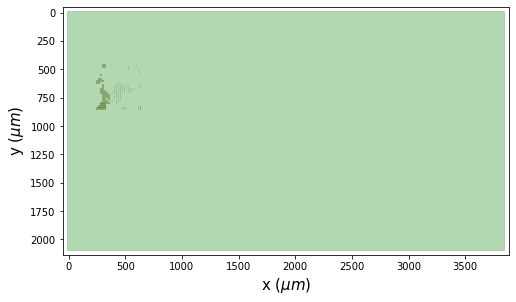

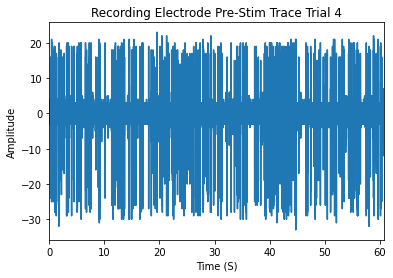

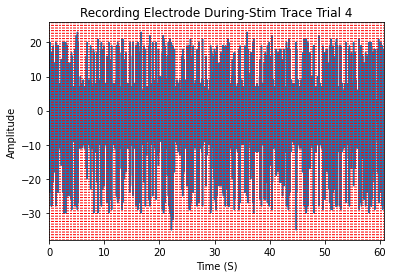

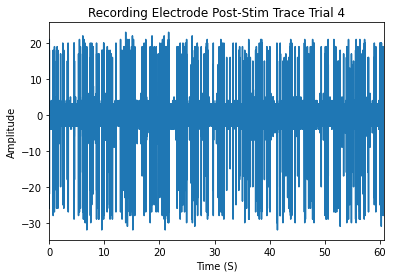

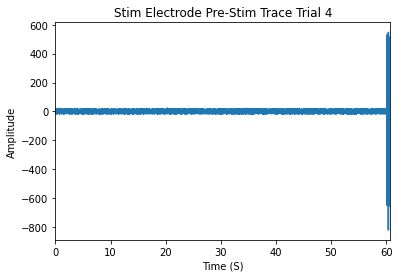

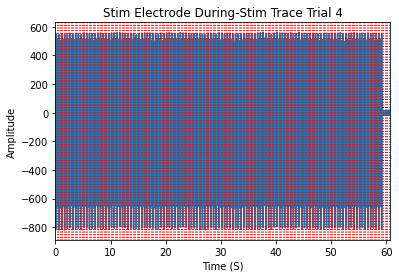

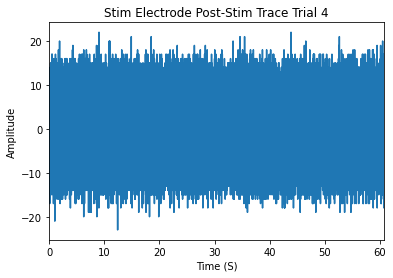

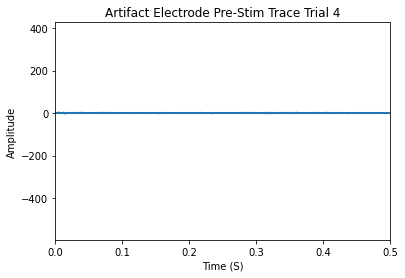

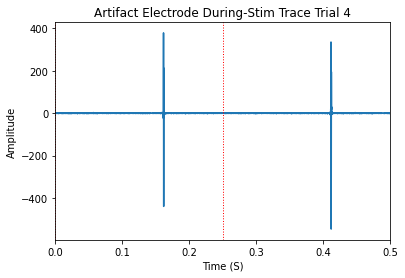

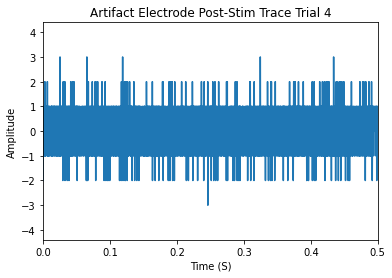

Pre-stim total spike count: 456
Stim total spike count: 777
Post-stim spike count: 552


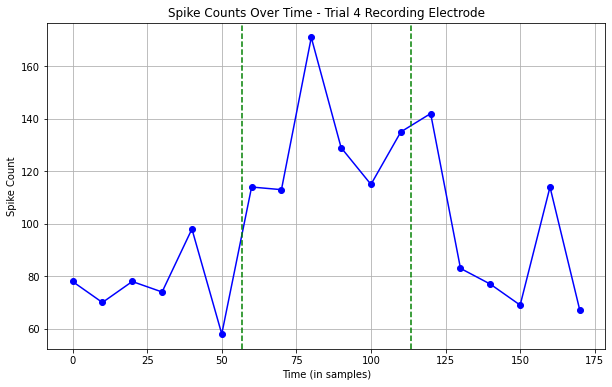

Pre-stim total spike count: 13858
Stim total spike count: 16060
Post-stim spike count: 13589


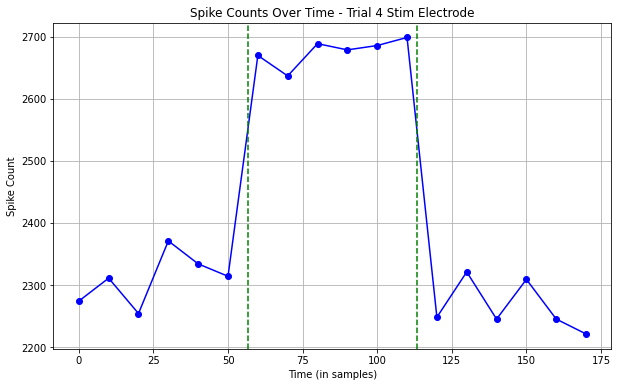

Pre-stim total spike count: 0
Stim total spike count: 969
Post-stim spike count: 0


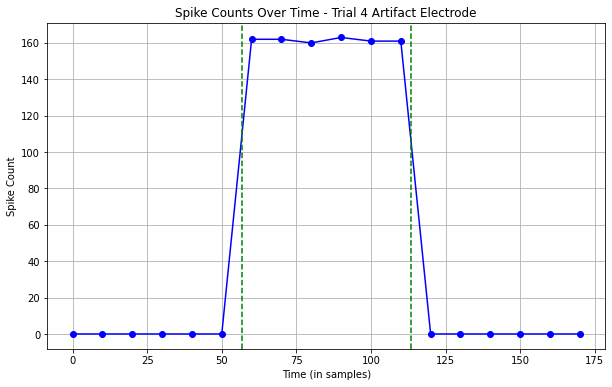

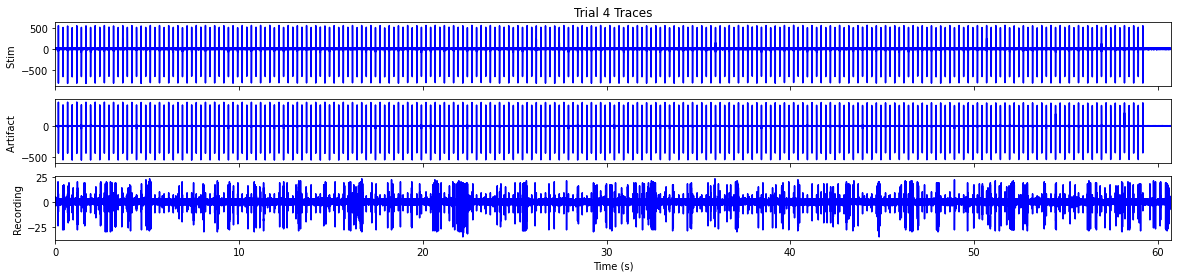

In [3]:
fp = '/mnt/disk15tb/nathaniel/Clean Stim N1/000189/data.raw.h5'
trial4_data = full_analysis(fp, trial_no=4, recording_electrode=8165, stim_electrode=8157, artifact_electrode=7937)


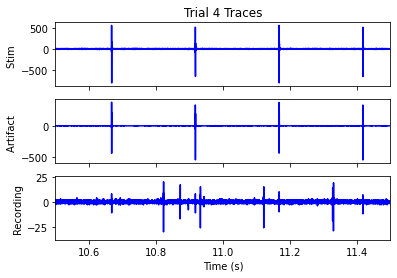

<Figure size 1440x288 with 0 Axes>

In [20]:

fp = '/mnt/disk15tb/nathaniel/Clean Stim N1/000189/data.raw.h5'
trial4_data = StimulationAnalysis(fp, recording_electrode=8165, stim_electrode=8157, artifact_electrode=7937)
trial4_data.plot_stim_traces(4, time_range=1, start_at=10.5)

# with h5py.File(fp, 'r') as h5file:

#     stim_times = h5file['assay/inputs/pulse_trains']

#     print(stim_times[:])



# Trial 3

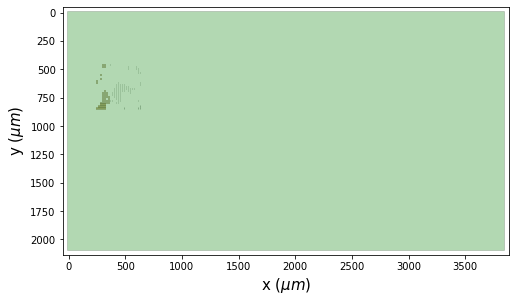

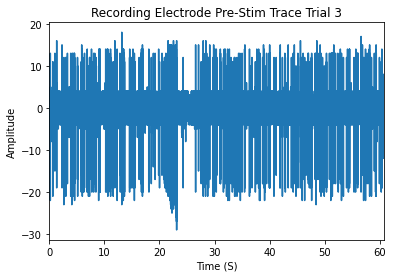

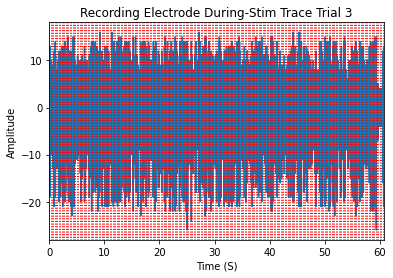

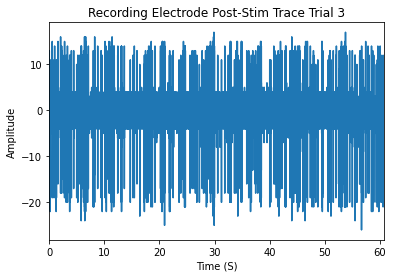

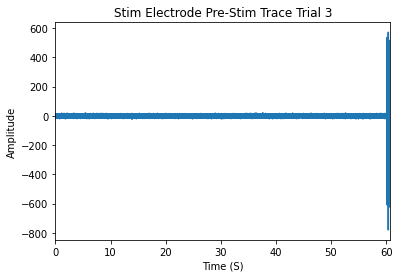

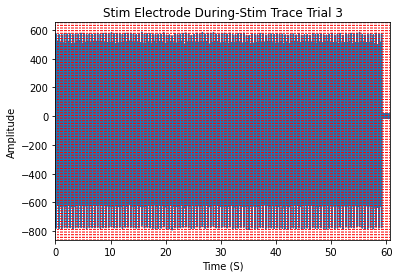

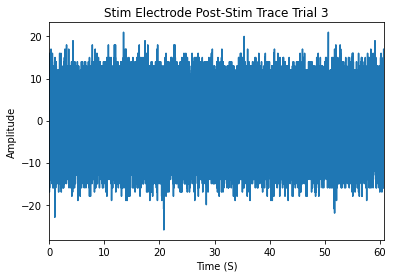

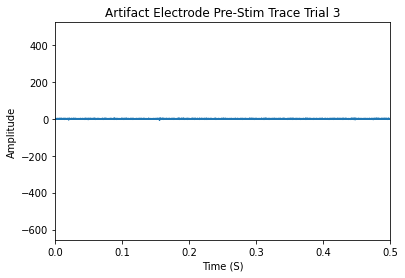

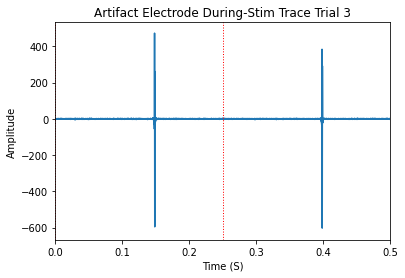

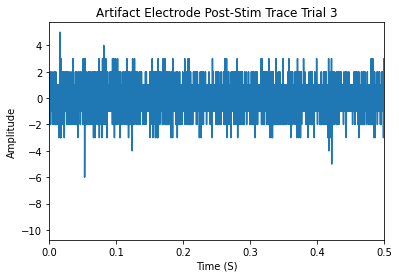

Pre-stim total spike count: 537
Stim total spike count: 747
Post-stim spike count: 467


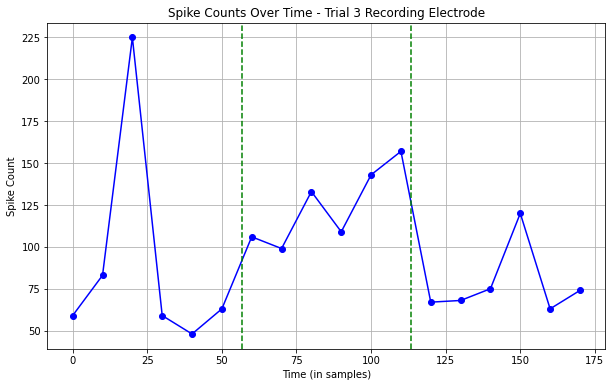

Pre-stim total spike count: 11059
Stim total spike count: 17870
Post-stim spike count: 11215


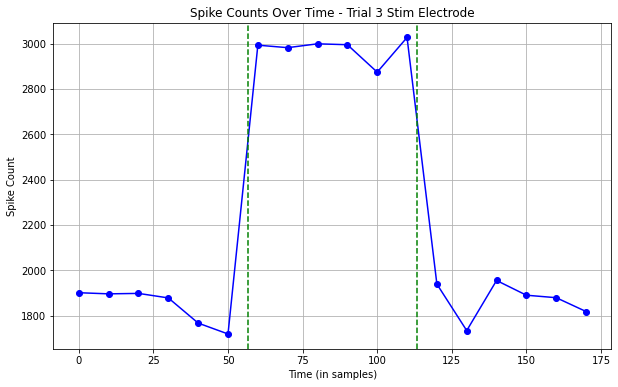

Pre-stim total spike count: 3
Stim total spike count: 1657
Post-stim spike count: 9


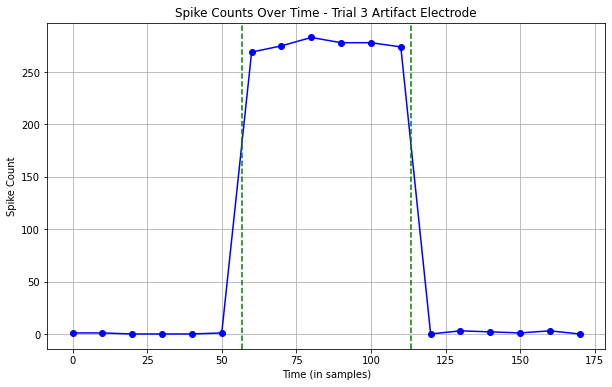

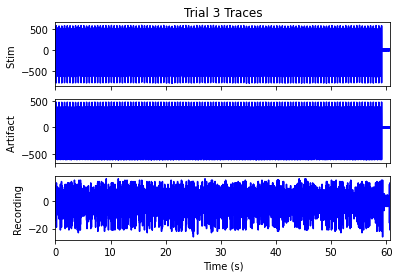

In [261]:
fp = '/mnt/disk15tb/nathaniel/Clean Stim N1/000185/data.raw.h5'
trial3_data = full_analysis(file_path=fp, trial_no=3, recording_electrode=8165, stim_electrode=9925, artifact_electrode=9924)



Pre-stim total spike count: 537
Stim total spike count: 747
Post-stim spike count: 467


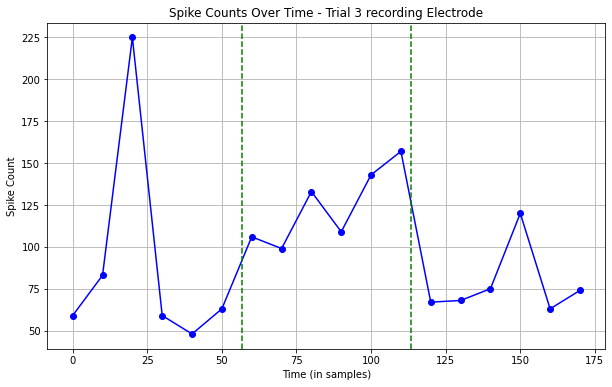

Pre-stim total spike count: 11059
Stim total spike count: 17870
Post-stim spike count: 11215


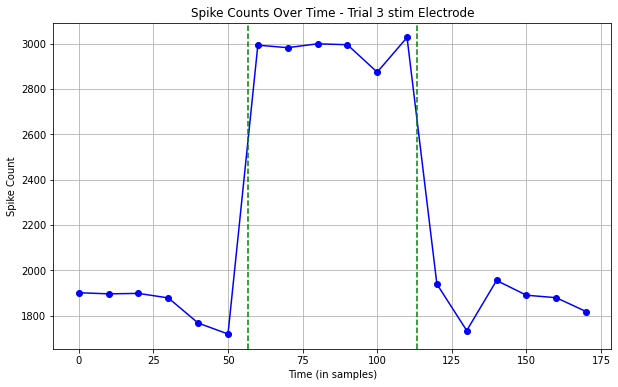

In [82]:
trial3_data.plot_spike_counts('recording', 3)
trial3_data.plot_spike_counts('stim', 3)

# Trial 2

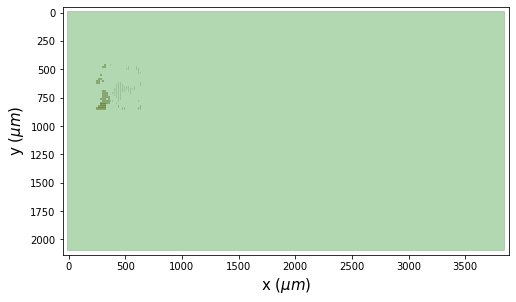

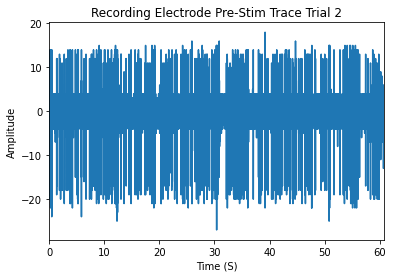

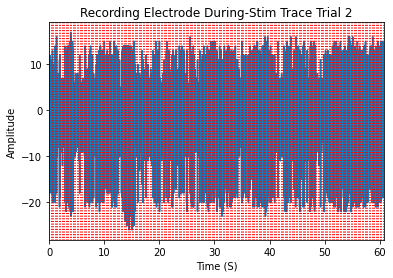

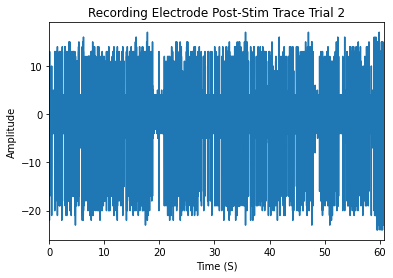

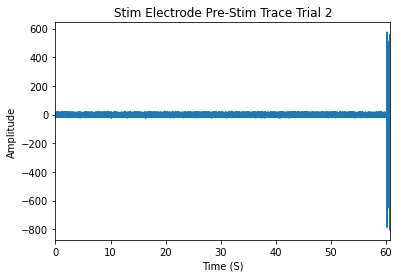

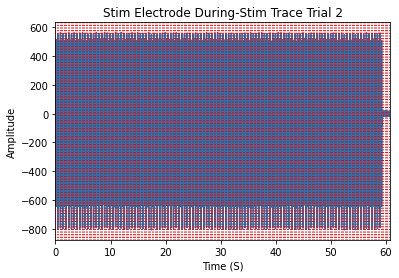

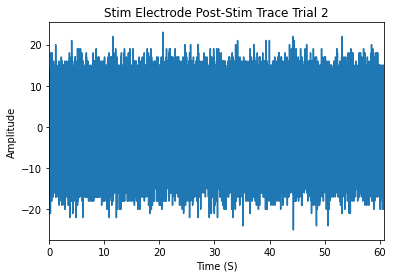

Pre-stim total spike count: 517
Stim total spike count: 1109
Post-stim spike count: 664


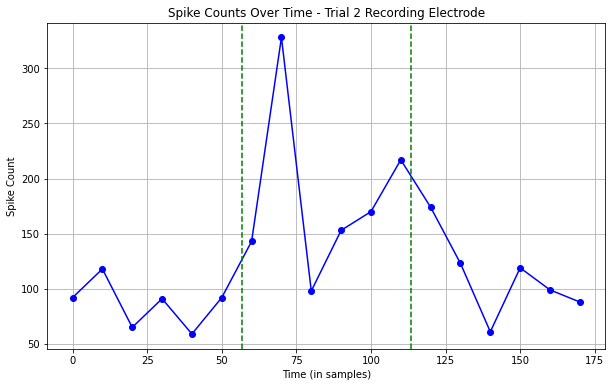

Pre-stim total spike count: 18583
Stim total spike count: 19956
Post-stim spike count: 18203


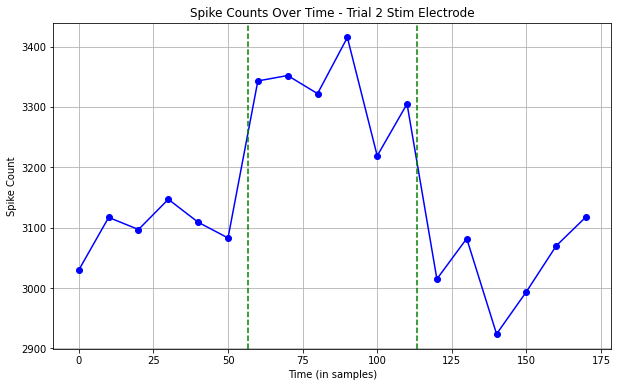

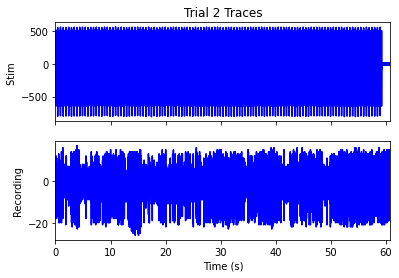

In [262]:
fp = '/mnt/disk15tb/nathaniel/Clean Stim N1/000181/data.raw.h5'
trial2_data = full_analysis(file_path=fp, trial_no=2, recording_electrode=8165, stim_electrode=8173)




Pre-stim total spike count: 517
Stim total spike count: 1109
Post-stim spike count: 664


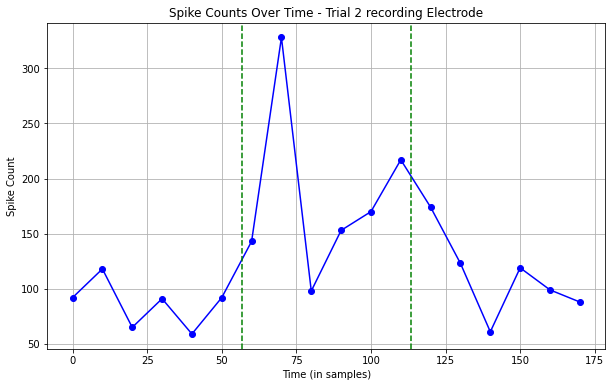

Pre-stim total spike count: 18583
Stim total spike count: 19956
Post-stim spike count: 18203


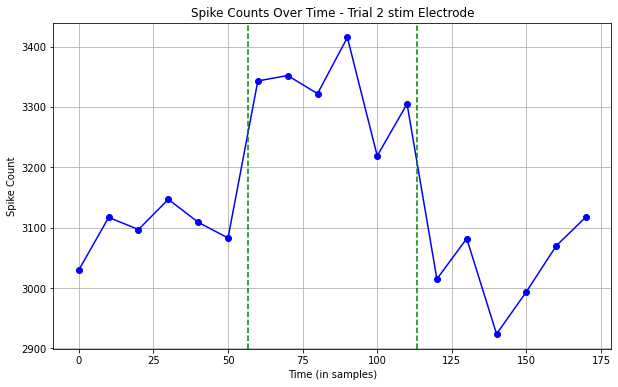

In [85]:


trial2_data.get_spike_counts()
trial2_data.plot_spike_counts('recording',2)
trial2_data.plot_spike_counts('stim',2)

# Trial 1

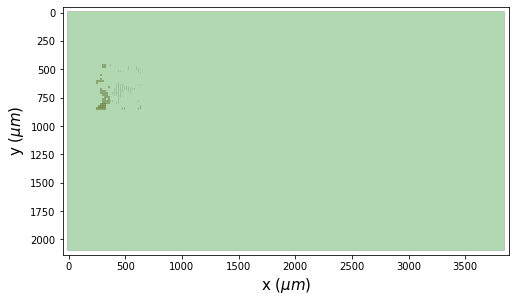

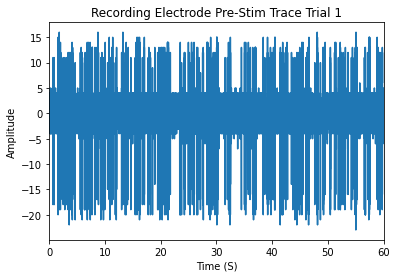

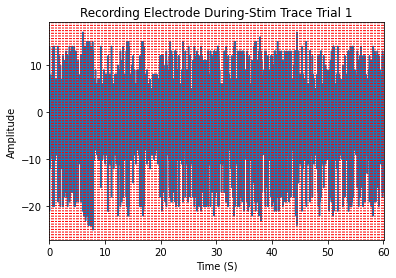

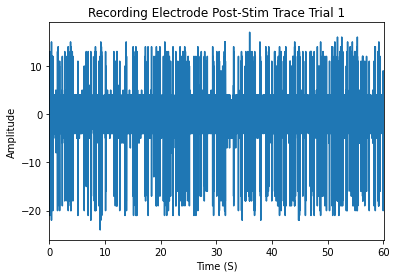

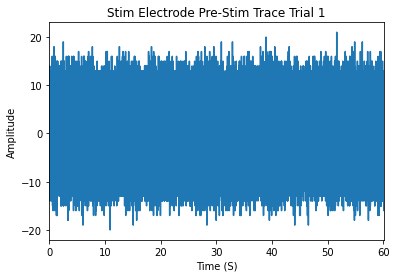

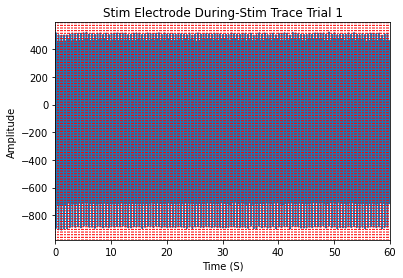

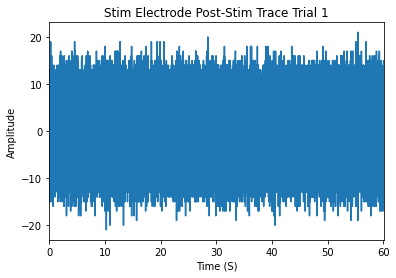

Pre-stim total spike count: 487
Stim total spike count: 841
Post-stim spike count: 470


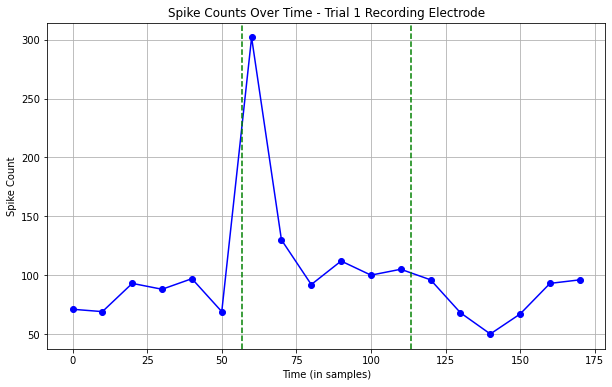

Pre-stim total spike count: 11206
Stim total spike count: 11636
Post-stim spike count: 11230


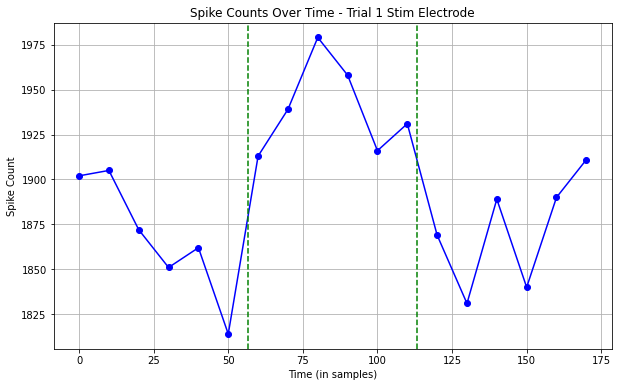

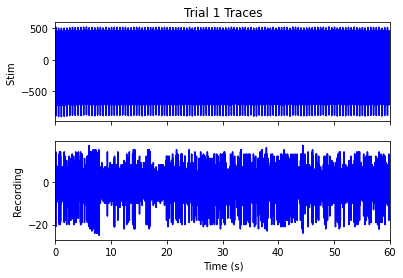

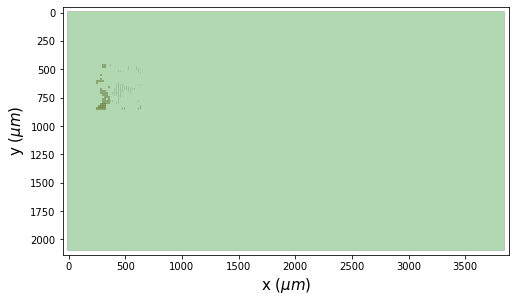

In [263]:
fp = '/mnt/disk15tb/nathaniel/Clean Stim N1/000177/data.raw.h5'
trial1_data = full_analysis(file_path=fp, trial_no=1, recording_electrode=8165, stim_electrode=6405)

trial1_data.plot_neuron_print()


Pre-stim total spike count: 487
Stim total spike count: 841
Post-stim spike count: 470


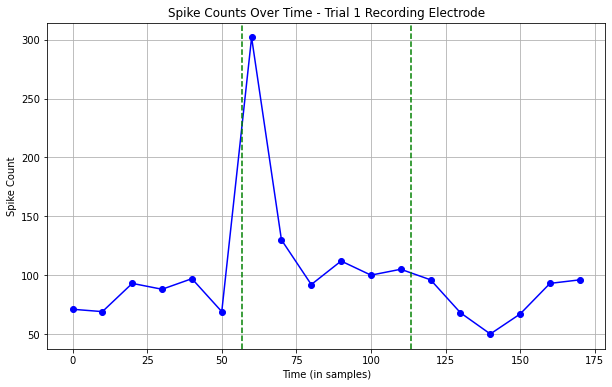

Pre-stim total spike count: 11206
Stim total spike count: 11636
Post-stim spike count: 11230


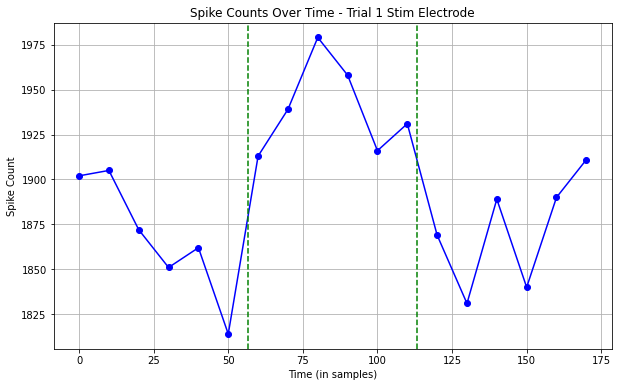

In [200]:
trial1_data.plot_spike_counts('recording', 1)
trial1_data.plot_spike_counts('stim', 1)

In [33]:
fp = '/mnt/disk15tb/nathaniel/000189/data.raw.h5'
recording = se.read_maxwell(fp)

channel_ids = recording.get_channel_ids()
fs = recording.get_sampling_frequency()
num_chan = recording.get_num_channels()
num_seg = recording.get_num_segments()
num_samples = recording.get_num_samples(segment_index=0)
total_recording = recording.get_total_duration()

start_time = 0
end_time = num_samples / fs

print('Sampling frequency:', fs)
print('No. of channels:', num_chan)
print('No. of segments:', num_seg)
print('total_recording:', total_recording)
print('No. of samples:', num_samples)
print(f'Start time: {start_time} seconds')
print(f'End time: {end_time} seconds')

recording_bp = si.bandpass_filter(recording, freq_min=300, freq_max=3000)

# Divide into three chunks: pre-stim, stim, post-stim

chunk_duration = total_recording / 3

samples_per_chunk = int(chunk_duration * fs)

pre_stim_start = 0
pre_stim_end = samples_per_chunk
pre_stim_data = recording_bp.get_traces(channel_ids=['572'], start_frame=pre_stim_start, end_frame=pre_stim_end)
print(recording_bp)
during_stim_start = pre_stim_end 
during_stim_end = pre_stim_end + samples_per_chunk 
during_stim_data = recording_bp.get_traces(channel_ids=['572'], start_frame=during_stim_start, end_frame=during_stim_end) 

post_stim_start = during_stim_end 
post_stim_end = num_samples 
post_stim_data = recording_bp.get_traces(channel_ids=['572'], start_frame=post_stim_start, end_frame=post_stim_end) 




Sampling frequency: 10000.0
No. of channels: 124
No. of segments: 1
total_recording: 182.26
No. of samples: 1822600
Start time: 0 seconds
End time: 182.26 seconds
BandpassFilterRecording: 124 channels - 10000.0Hz - 1 segments - 1,822,600 samples 
                         182.26s (3.04 minutes) - int16 dtype - 431.07 MiB


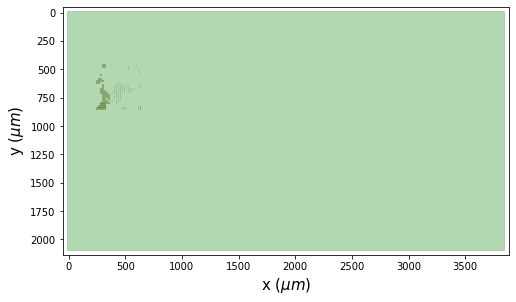

In [10]:
fig, ax = plt.subplots(figsize=(8,8))
si.plot_probe_map(recording_bp, ax=ax, with_channel_ids=False)
ax.invert_yaxis()

# Clean Method N2

## Trial 1

Stim Channel: 950
Recording Channel: 980


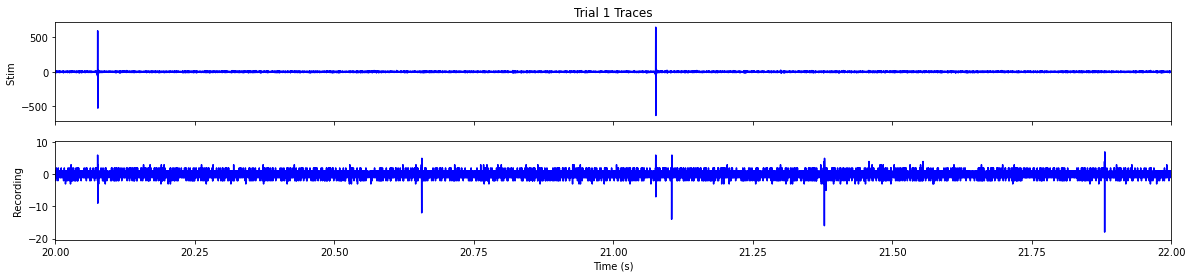

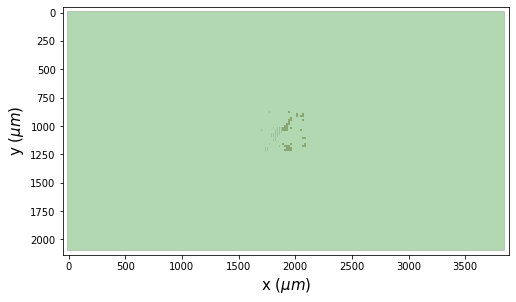

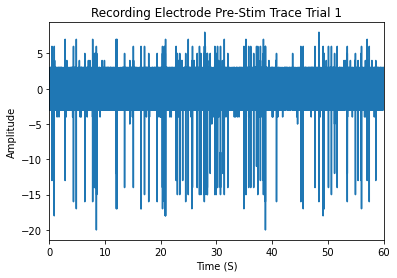

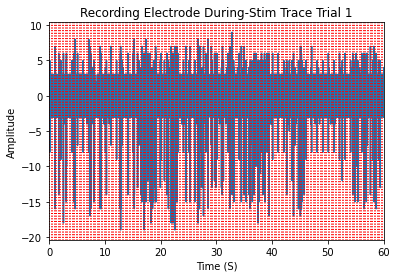

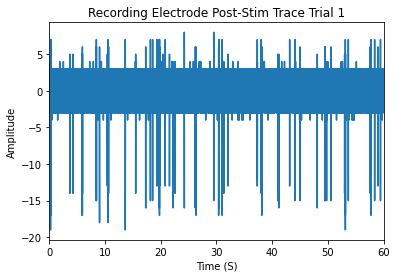

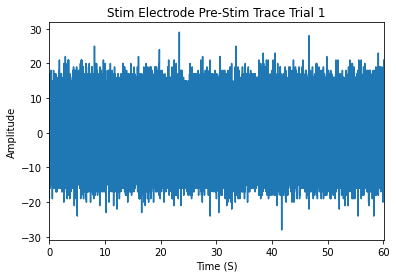

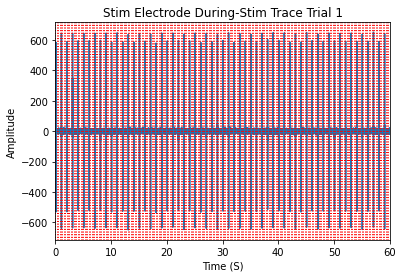

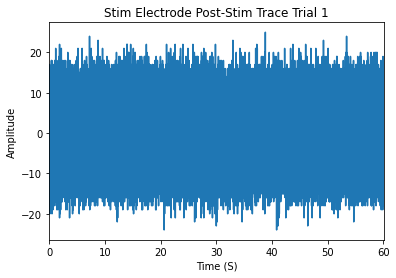

Pre-stim total spike count: 150
Stim total spike count: 198
Post-stim spike count: 141


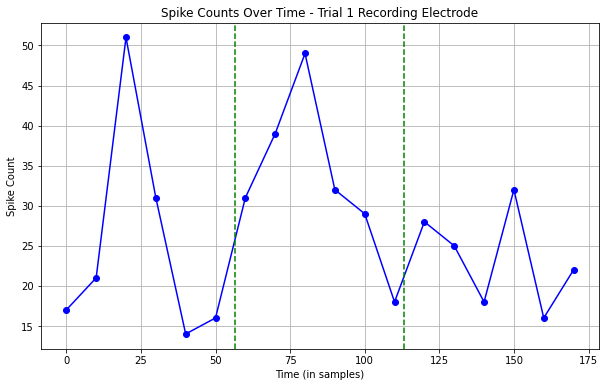

Pre-stim total spike count: 19412
Stim total spike count: 19560
Post-stim spike count: 18992


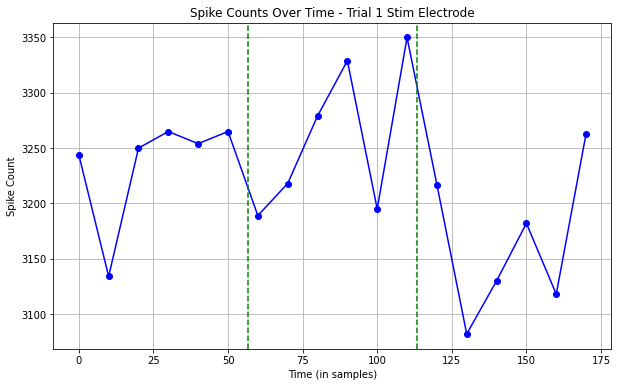

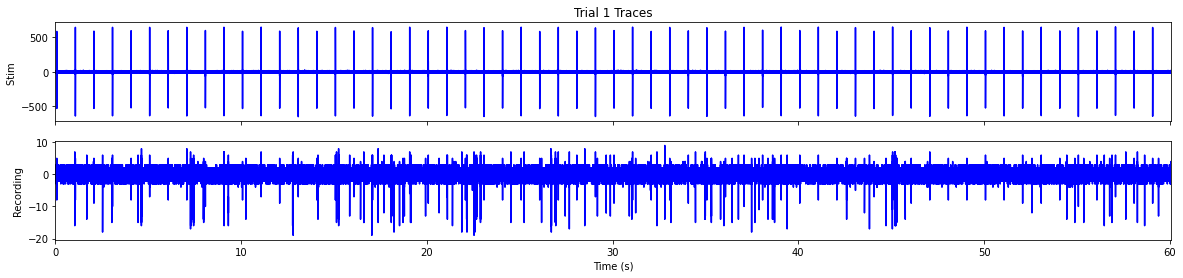

In [27]:
fp = '/mnt/disk15tb/nathaniel/Clean Stim N2/000228/data.raw.h5'
n2_t1_data = StimulationAnalysis(fp, recording_electrode=13306, stim_electrode=14846)
print(f'Stim Channel: {n2_t1_data.stim_channel}')
print(f'Recording Channel: {n2_t1_data.rec_channel}')
#print(n2_t1_data.get_spike_counts())
n2_t1_data.plot_stim_traces(1, bp_filter=True, time_range=2, start_at=20)
full_analysis(fp, 1, recording_electrode=13306, stim_electrode=14846)



## Trial 2

Stim Channel: 861
Recording Channel: 913


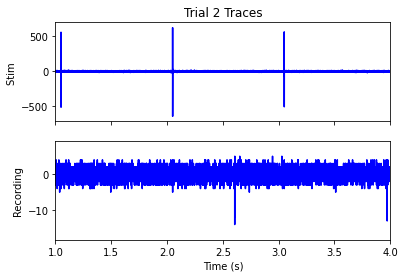

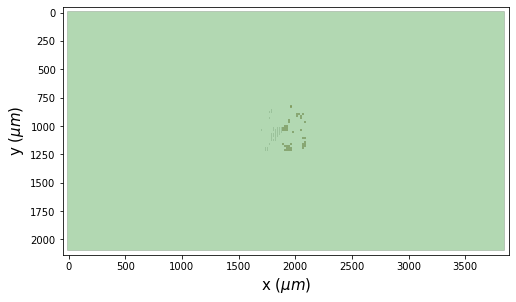

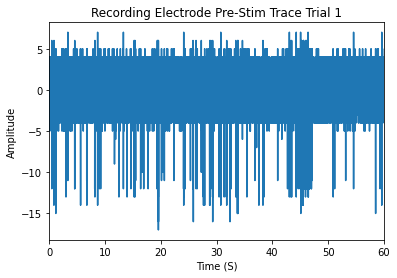

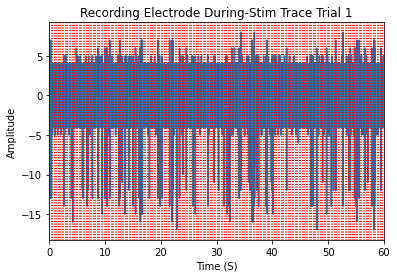

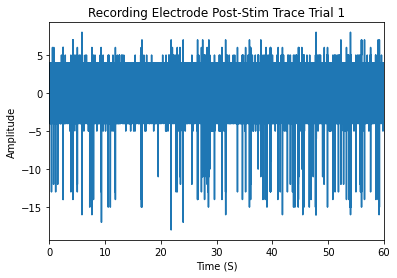

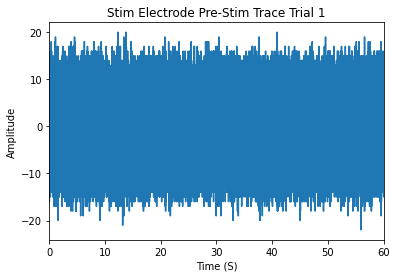

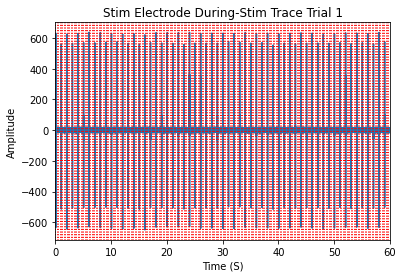

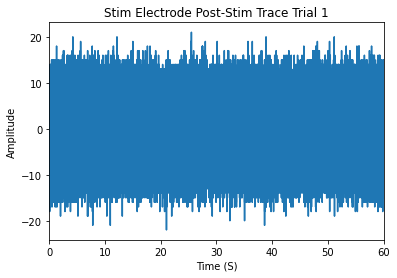

Pre-stim total spike count: 276
Stim total spike count: 175
Post-stim spike count: 209


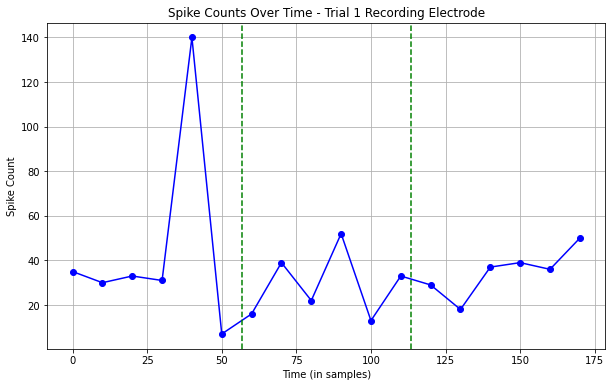

Pre-stim total spike count: 13811
Stim total spike count: 13894
Post-stim spike count: 13705


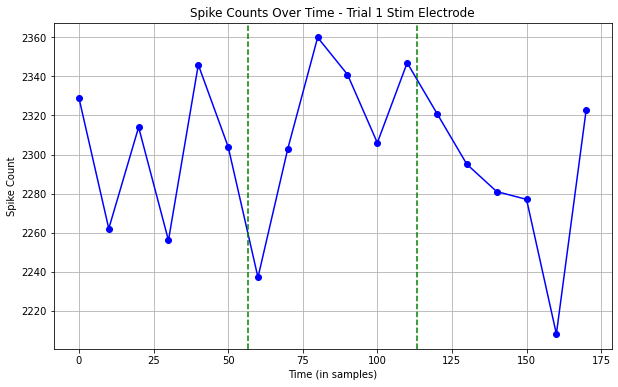

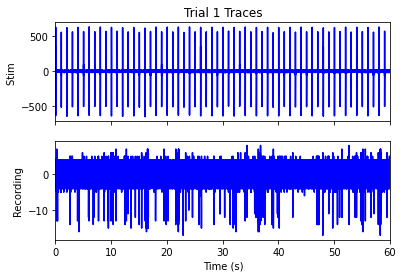

In [265]:
fp = '/mnt/disk15tb/nathaniel/Clean Stim N2/000226/data.raw.h5'
n2_t1_data = StimulationAnalysis(fp, recording_electrode=13306, stim_electrode=13313)
print(f'Stim Channel: {n2_t1_data.stim_channel}')
print(f'Recording Channel: {n2_t1_data.rec_channel}')
#print(n2_t1_data.get_spike_counts())
n2_t1_data.plot_stim_traces(2, bp_filter=True, time_range=3, start_at=1)
full_analysis(fp, 1, recording_electrode=13306, stim_electrode=13313)

## Trial 3

Stim Channel: 886
Recording Channel: 913


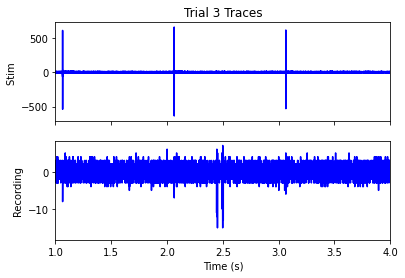

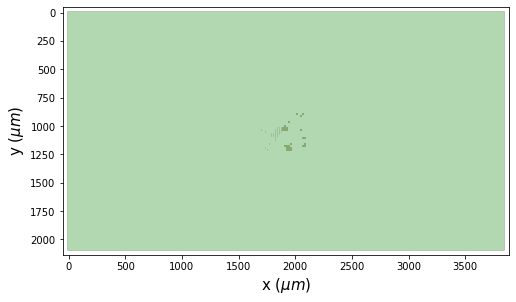

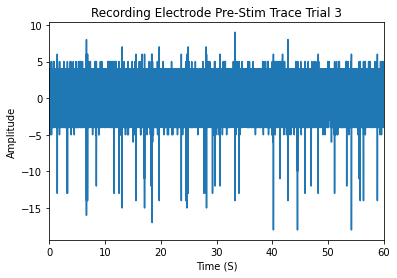

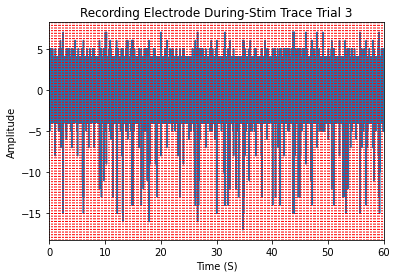

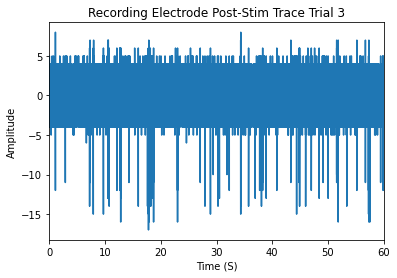

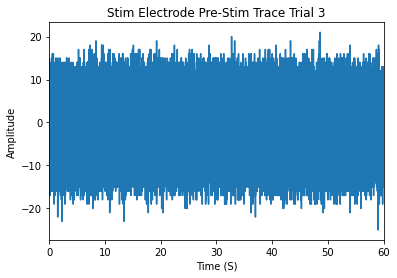

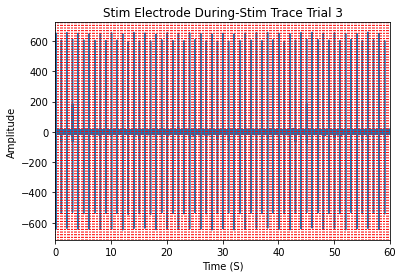

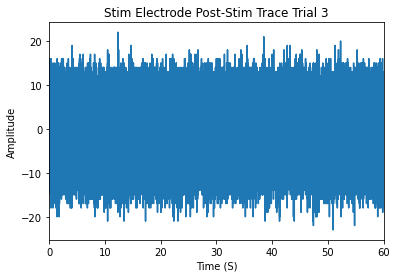

Pre-stim total spike count: 114
Stim total spike count: 151
Post-stim spike count: 179


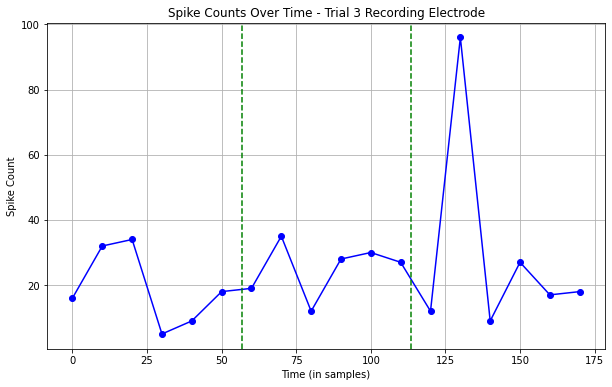

Pre-stim total spike count: 15066
Stim total spike count: 14641
Post-stim spike count: 14272


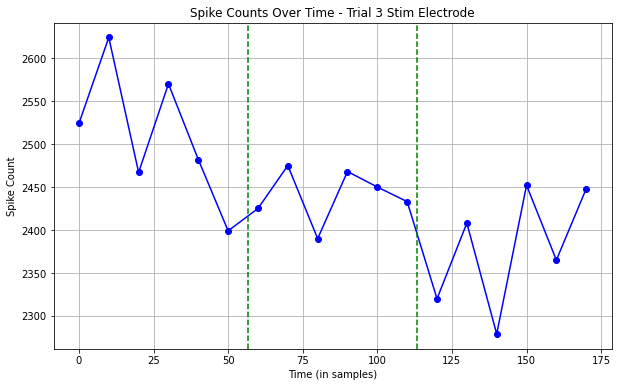

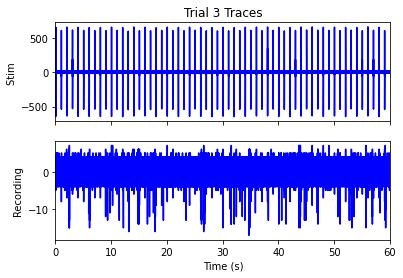

In [5]:
fp = '/mnt/disk15tb/nathaniel/Clean Stim N2/000230/data.raw.h5'
n2_t1_data = StimulationAnalysis(fp, recording_electrode=13306, stim_electrode=13299)
print(f'Stim Channel: {n2_t1_data.stim_channel}')
print(f'Recording Channel: {n2_t1_data.rec_channel}')
#print(n2_t1_data.get_spike_counts())
n2_t1_data.plot_stim_traces(3, bp_filter=True, time_range=3, start_at=1)
full_analysis(fp, 3, recording_electrode=13306, stim_electrode=13299)

## Trial 4

Stim Channel: 950
Recording Channel: 913


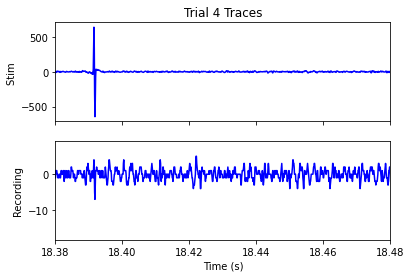

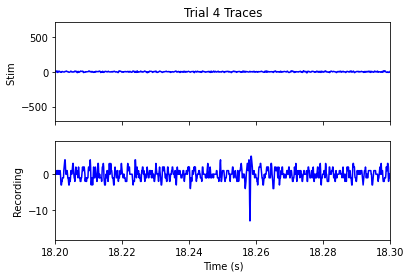

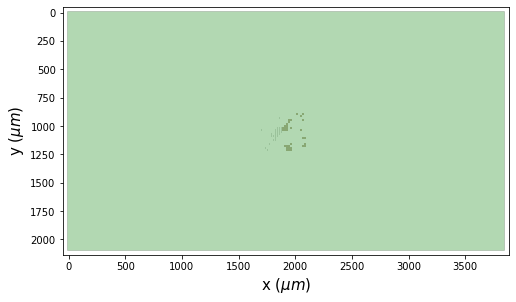

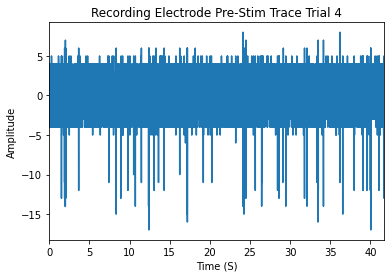

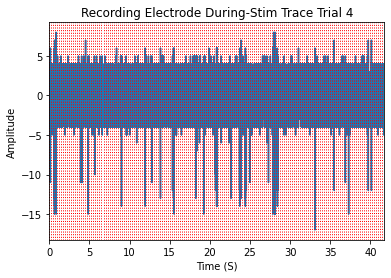

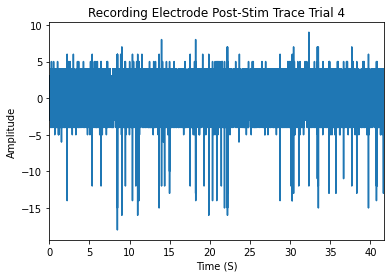

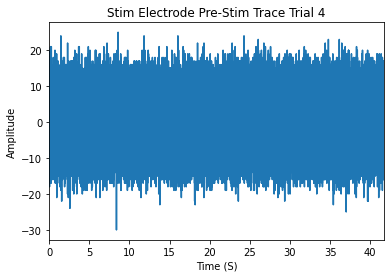

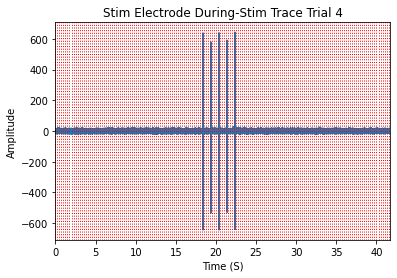

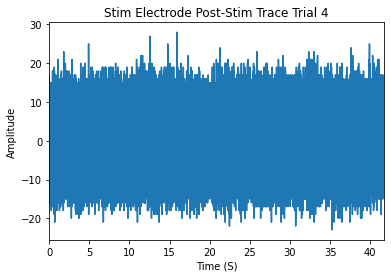

Pre-stim total spike count: 89
Stim total spike count: 135
Post-stim spike count: 82


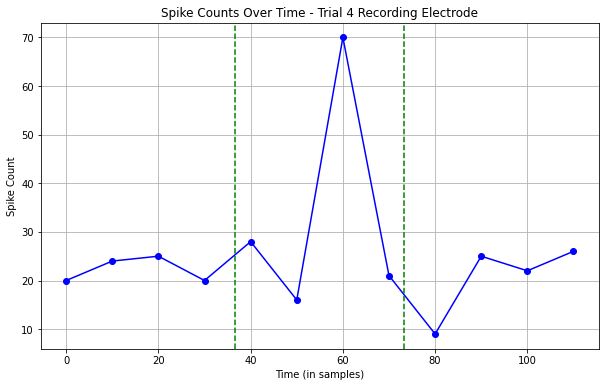

Pre-stim total spike count: 13575
Stim total spike count: 13631
Post-stim spike count: 13376


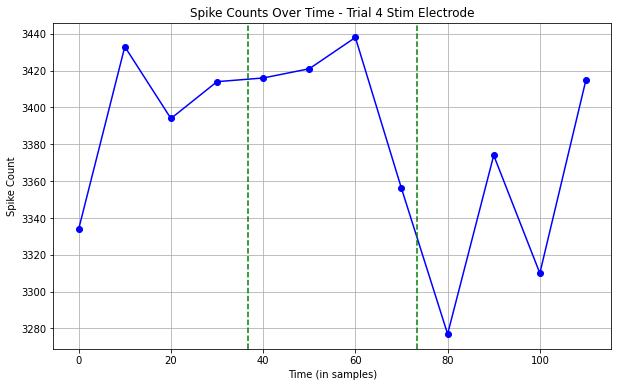

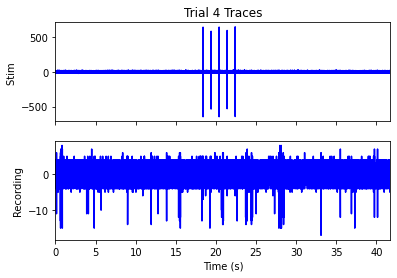

In [15]:
fp = '/mnt/disk15tb/nathaniel/Clean Stim N2/000233/data.raw.h5'
n2_t1_data = StimulationAnalysis(fp, recording_electrode=13306, stim_electrode=11766)
print(f'Stim Channel: {n2_t1_data.stim_channel}')
print(f'Recording Channel: {n2_t1_data.rec_channel}')
#print(n2_t1_data.get_spike_counts())
n2_t1_data.plot_stim_traces(4, bp_filter=True, time_range=0.1, start_at=18.38)
n2_t1_data.plot_stim_traces(4, bp_filter=True, time_range=0.1, start_at=18.2)
full_analysis(fp, 4, recording_electrode=13306, stim_electrode=11766)

# Dirty Method N2

Stim Channel: 901
Recording Channel: 862


            Time Range  Channel 862  Channel 901
0          0 to 100000            0         3341
1     100000 to 200000            0         3473
2     200000 to 300000            0         3369
3     300000 to 400000            0         3334
4     400000 to 500000            0         3353
5     500000 to 600000            0         3404
6     600000 to 700000            0         3582
7     700000 to 800000            0         3660
8     800000 to 900000            0         3531
9    900000 to 1000000            0         3549
10  1000000 to 1100000            0         3671
11  1100000 to 1200000            0         3640
12  1200000 to 1300000            0         3436
13  1300000 to 1400000            0         3331
14  1400000 to 1500000            0         3411
15  1500000 to 1600000            0         3356
16  1600000 to 1700000            0         3290
17  1700000 to 1800000            0         3361


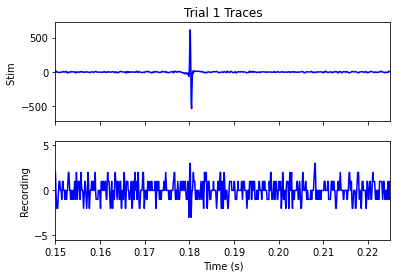

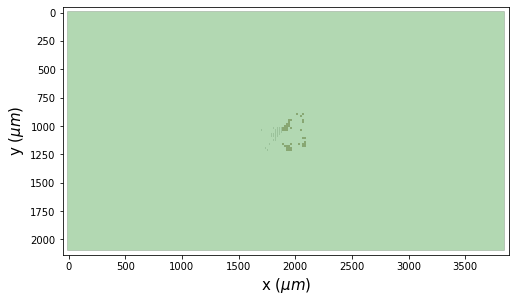

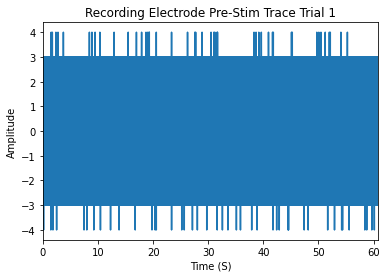

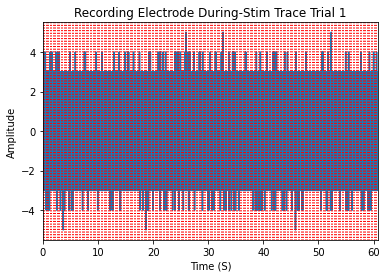

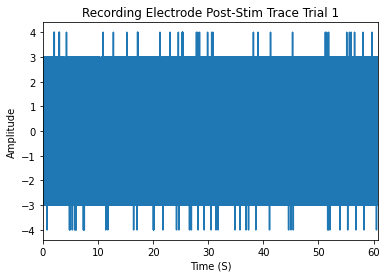

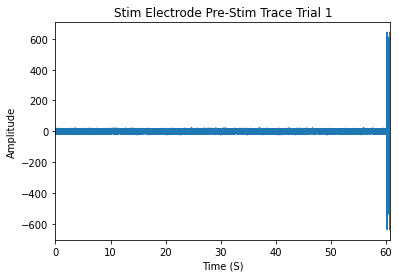

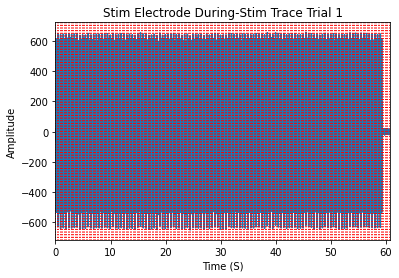

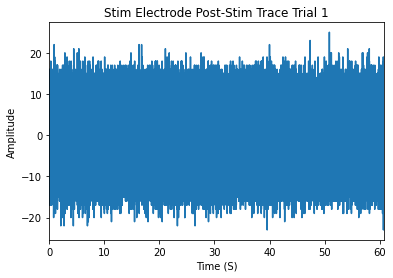

Pre-stim total spike count: 0
Stim total spike count: 0
Post-stim spike count: 0


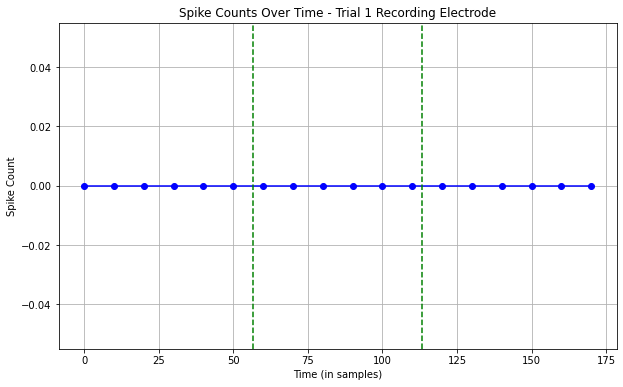

Pre-stim total spike count: 20274
Stim total spike count: 21633
Post-stim spike count: 20185


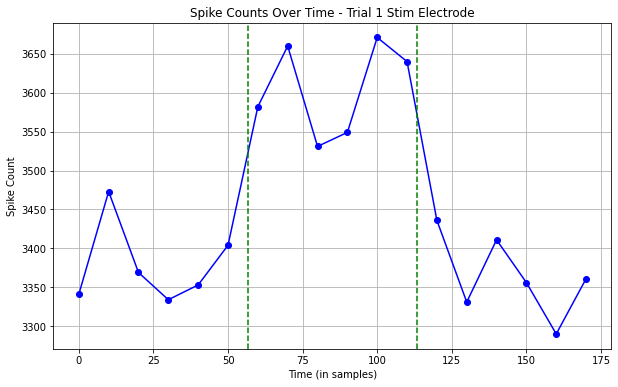

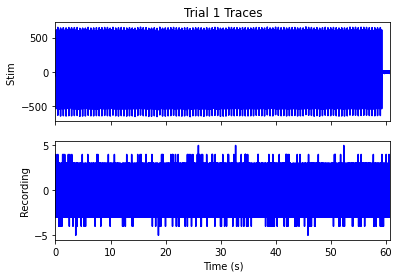

In [8]:
fp = '/mnt/disk15tb/nathaniel/Unclean Stim N2/000236/data.raw.h5'
n2_t1_data = StimulationAnalysis(fp, recording_electrode=13077, stim_electrode=13525)
print(f'Stim Channel: {n2_t1_data.stim_channel}')
print(f'Recording Channel: {n2_t1_data.rec_channel}')
print(n2_t1_data.get_spike_counts())
n2_t1_data.plot_stim_traces(1, bp_filter=True, time_range=0.075, start_at=0.15)
full_analysis(fp, 1, recording_electrode=13077, stim_electrode=13525)